In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['figure.dpi']= 300
import scipy.stats as stats
import math
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler


In [51]:
ozoneData2020=pd.read_csv("E:/projects/CSE-587-Air-Quality-Prediction-Model/RawData/RawData2019/Ozone_2019.csv")
ozoneData2020.describe()



,Unnamed: 0,state_code,county_code,site_number,parameter_code,poc,latitude,longitude,observation_count,observation_percent,arithmetic_mean,first_max_value,first_max_hour,aqi,method_code,cbsa_code
count,39721.000000,39721.0,39721.000000,39721.000000,39721.0,39721.000000,39721.000000,39721.000000,39721.000000,39721.000000,39721.000000,39721.000000,39721.000000,29779.000000,39721.000000,34292.000000
mean,19860.000000,36.0,63.287757,1180.316508,44201.0,1.093704,42.243807,-75.009351,21.788525,97.967725,0.030081,0.039091,10.924775,35.903220,82.630523,32264.406859
std,11466.609358,0.0,35.342500,2691.056539,0.0,0.390123,1.218591,1.834932,3.397676,7.696605,0.009155,0.010456,5.138057,11.651047,12.477607,10184.493546
min,0.000000,36.0,1.000000,2.000000,44201.0,1.000000,40.580270,-79.318810,1.000000,4.000000,0.000824,0.003000,0.000000,3.000000,47.000000,10580.000000
25%,9930.000000,36.0,31.000000,4.000000,44201.0,1.000000,40.960780,-76.463240,17.000000,100.000000,0.023542,0.032000,9.000000,29.000000,87.000000,27460.000000
50%,19860.000000,36.0,67.000000,9.000000,44201.0,1.000000,42.400600,-74.028190,24.000000,100.000000,0.030118,0.038000,11.000000,35.000000,87.000000,35620.000000
75%,29790.000000,36.0,101.000000,1006.000000,44201.0,1.000000,43.223860,-73.757330,24.000000,100.000000,0.036667,0.046000,13.000000,42.000000,87.000000,35620.000000
max,39720.000000,36.0,119.000000,9991.000000,44201.0,3.000000,44.393080,-72.712380,24.000000,100.000000,0.064333,0.118000,23.000000,150.000000,87.000000,48060.000000


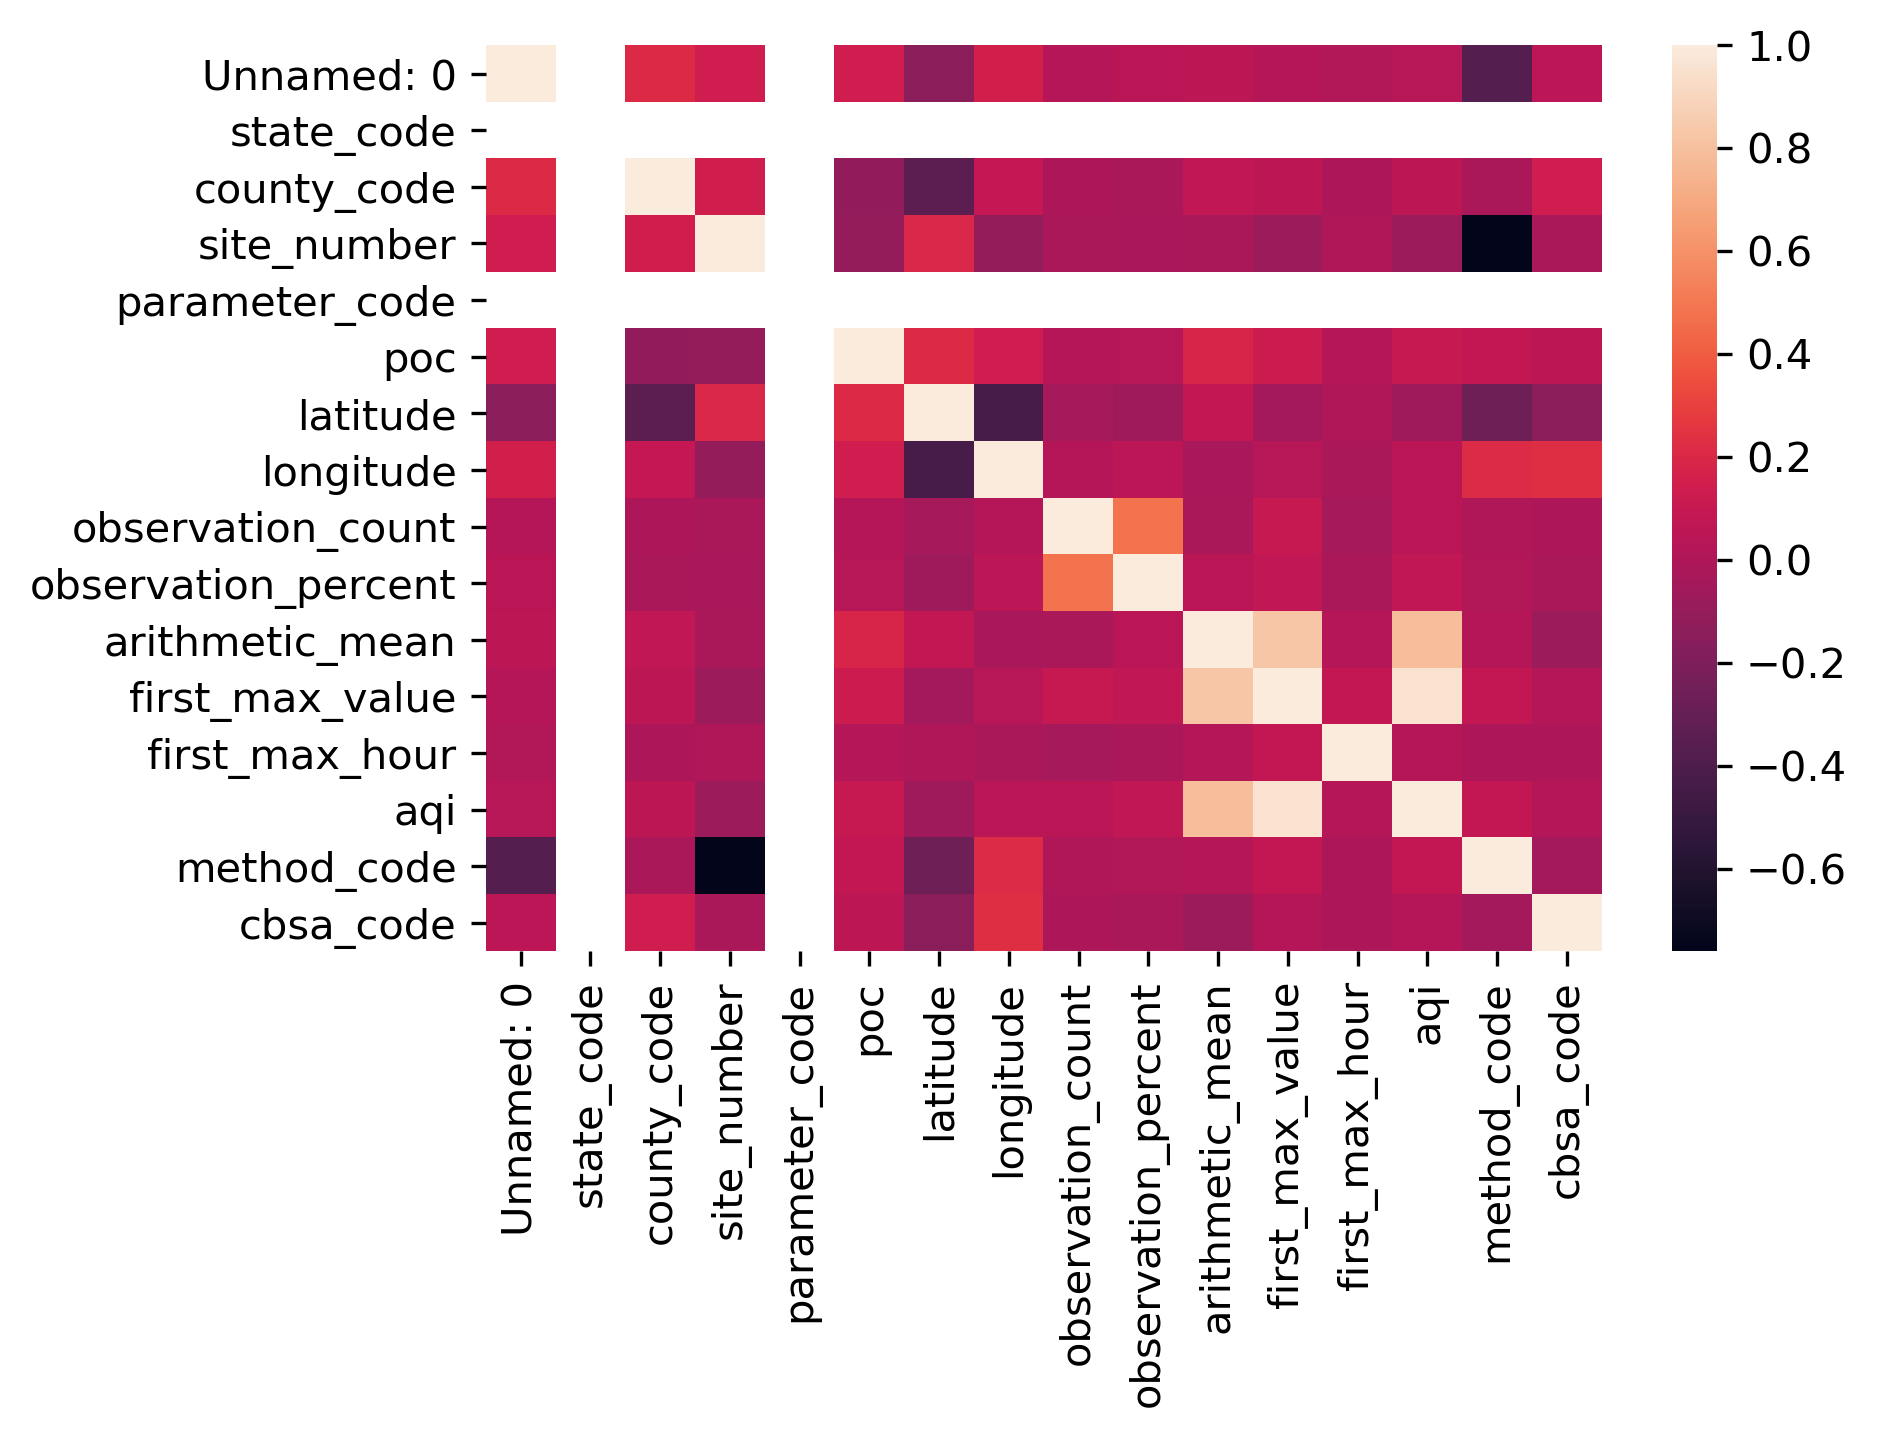

In [53]:

corr=ozoneData2020.corr()
corr.style.background_gradient(cmap='RdBu_r').set_precision(3)
# plt.matshow(corr)
# plt.show()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)
plt.savefig('E:/projects/CSE-587-Air-Quality-Prediction-Model/RawData/filename.png',dpi=300)

In [55]:
missingValueCount=ozoneData2020.isnull().sum()
missingValueCount=carbonMonoOxide2020.isnull().sum()
print(missingValueCount)

Unnamed: 0                0
state_code                0
county_code               0
site_number               0
parameter_code            0
poc                       0
latitude                  0
longitude                 0
datum                     0
parameter                 0
sample_duration           0
pollutant_standard        0
date_local                0
units_of_measure          0
event_type                0
observation_count         0
observation_percent       0
validity_indicator        0
arithmetic_mean           0
first_max_value           0
first_max_hour            0
aqi                    3172
method_code               0
method                    0
local_site_name           0
site_address              0
state                     0
county                    0
city                      0
cbsa_code                 0
cbsa                      0
date_of_last_change       0
dtype: int64


In [56]:
ozoneData2020.shape
list(ozoneData2020.columns) 
print(ozoneData2020['method_code'].unique())
print(ozoneData2020['pollutant_standard'].unique())
grouped=ozoneData2020.groupby(['pollutant_standard'])
print(grouped['pollutant_standard'].count())
print(ozoneData2020['sample_duration'].unique())
print(ozoneData2020['units_of_measure'].unique())
print(ozoneData2020['event_type'].unique())



[87 47]
['Ozone 1-hour 1979' 'Ozone 8-Hour 1997' 'Ozone 8-Hour 2008'
 'Ozone 8-hour 2015']
pollutant_standard
Ozone 1-hour 1979    9942
Ozone 8-Hour 1997    9933
Ozone 8-Hour 2008    9933
Ozone 8-hour 2015    9913
Name: pollutant_standard, dtype: int64
['1 HOUR' '8-HR RUN AVG BEGIN HOUR']
['Parts per million']
['None']


In [57]:
#1. removing columns

#removing country_code and state_code because it is same for all data points




#2. removing rows
ozoneData2020New=ozoneData2020[['date_local','site_number','parameter','sample_duration','pollutant_standard',
                                'validity_indicator','arithmetic_mean','first_max_value','aqi',
                                'local_site_name','state']].copy()

ozoneData2020New = ozoneData2020New[ozoneData2020New['pollutant_standard'] == "Ozone 8-hour 2015"] 
print(ozoneData2020New.shape)

#----begin converting date_local column type from object to datetime64-------

#3. parsing dates
ozoneData2020New['date_local']=pd.to_datetime(ozoneData2020New['date_local'])

# ozoneData2020New.index=ozoneData2020New['date_local']


#4. null value check

missingValueCount=ozoneData2020New.isnull().sum()
print(missingValueCount)

                               



(9913, 11)
date_local            0
site_number           0
parameter             0
sample_duration       0
pollutant_standard    0
validity_indicator    0
arithmetic_mean       0
first_max_value       0
aqi                   0
local_site_name       0
state                 0
dtype: int64


In [58]:
######Remove Invalid Values ######

print(ozoneData2020New['validity_indicator'].unique())
grouped=ozoneData2020New.groupby(['validity_indicator'])
print(grouped['validity_indicator'].count())


ozoneData2020New = ozoneData2020New[ozoneData2020New['validity_indicator'] == "Y"] 
print(ozoneData2020New.shape)
# ozoneData2020New.to_csv('E:/projects/CSE-587-Air-Quality-Prediction-Model/CleanedData/ozone_ny_data_2020.csv')




['Y' 'N']
validity_indicator
N     242
Y    9671
Name: validity_indicator, dtype: int64
(9671, 11)


In [59]:
#5. duplicate check

duplicate = ozoneData2020New[ozoneData2020New.duplicated(['date_local','local_site_name','arithmetic_mean','first_max_value','aqi'])] 
    
print(duplicate)

    

Empty DataFrame
Columns: [date_local, site_number, parameter, sample_duration, pollutant_standard, validity_indicator, arithmetic_mean, first_max_value, aqi, local_site_name, state]
Index: []


In [60]:
#6. removing outliers using robust z-score --- use this

#plot some graph
med=np.median(ozoneData2020New['arithmetic_mean'])
ma = stats.median_abs_deviation(ozoneData2020New['arithmetic_mean'])
mad=np.median(ma)
ozoneData2020New = ozoneData2020New.query('(((0.6745*(arithmetic_mean-@med))/@mad)<3) & (((0.6745*(arithmetic_mean-@med))/@mad)>-3)')
print(ozoneData2020New.shape)
ozoneData2020New.describe()

(9664, 11)


,site_number,arithmetic_mean,first_max_value,aqi
count,9664.000000,9664.000000,9664.000000,9664.000000
mean,1183.677463,0.030994,0.037947,35.776387
std,2695.894669,0.009524,0.010022,11.530161
min,2.000000,0.002118,0.005000,5.000000
25%,4.000000,0.024235,0.031000,29.000000
50%,9.000000,0.031059,0.037000,34.000000
75%,1006.000000,0.037706,0.045000,42.000000
max,9991.000000,0.060059,0.079000,129.000000


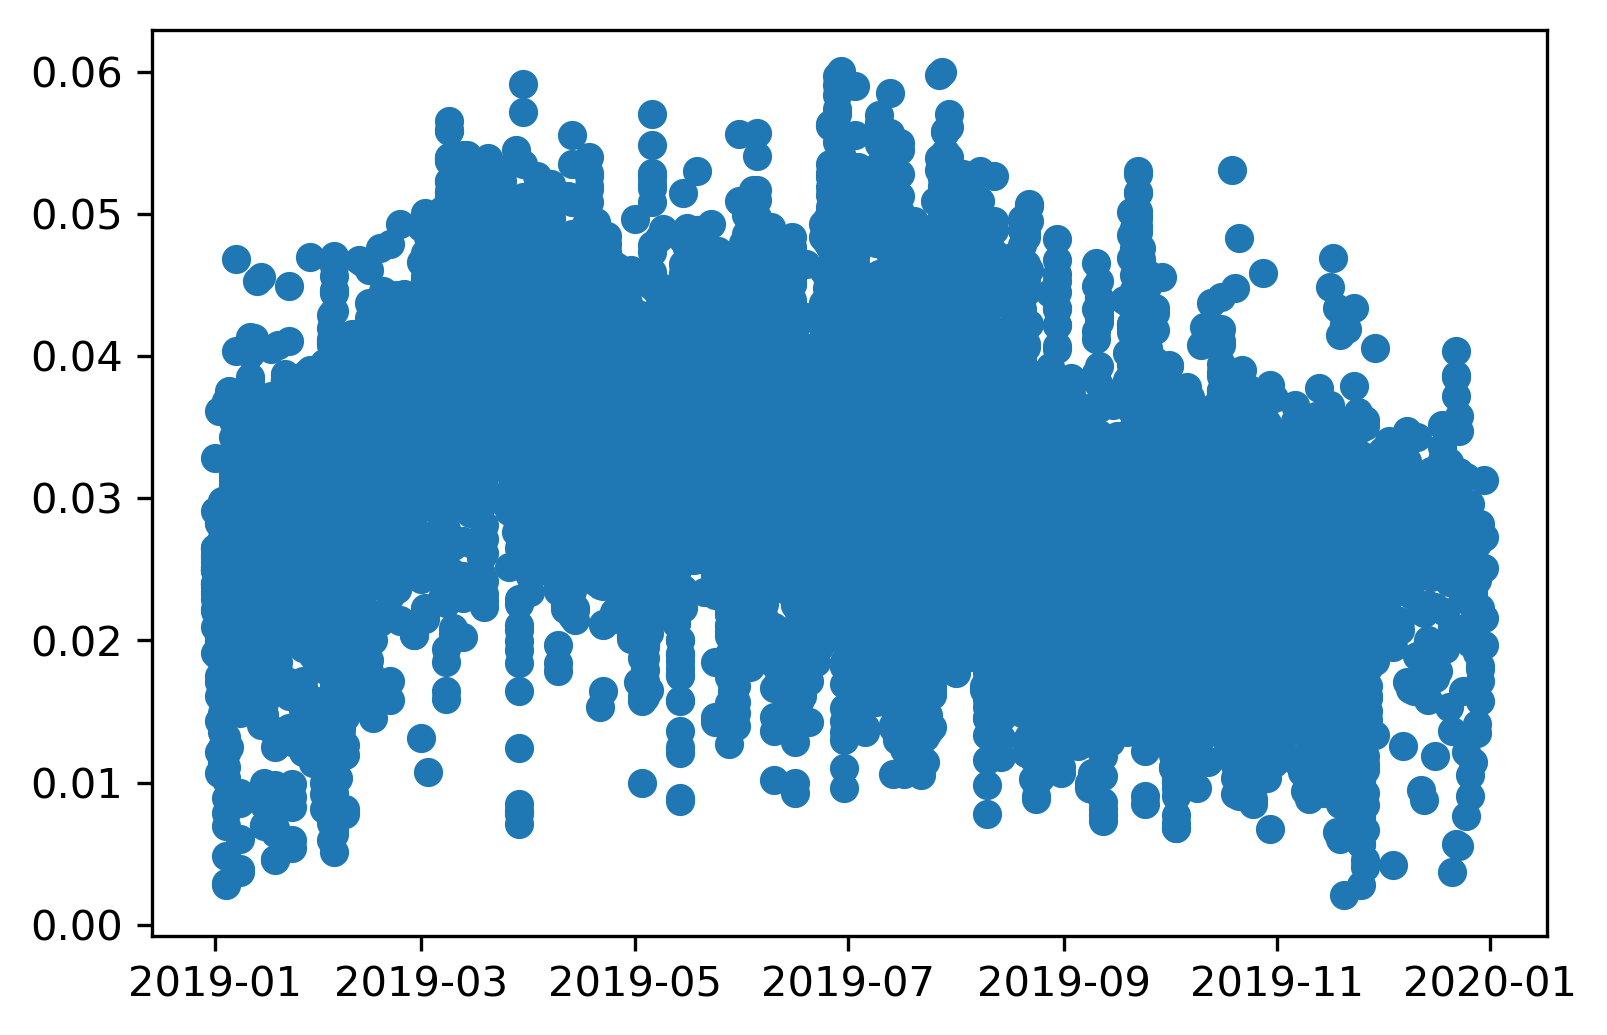

In [61]:
#group by date and average
plt.scatter(x=ozoneData2020New['date_local'], y=ozoneData2020New['arithmetic_mean'])

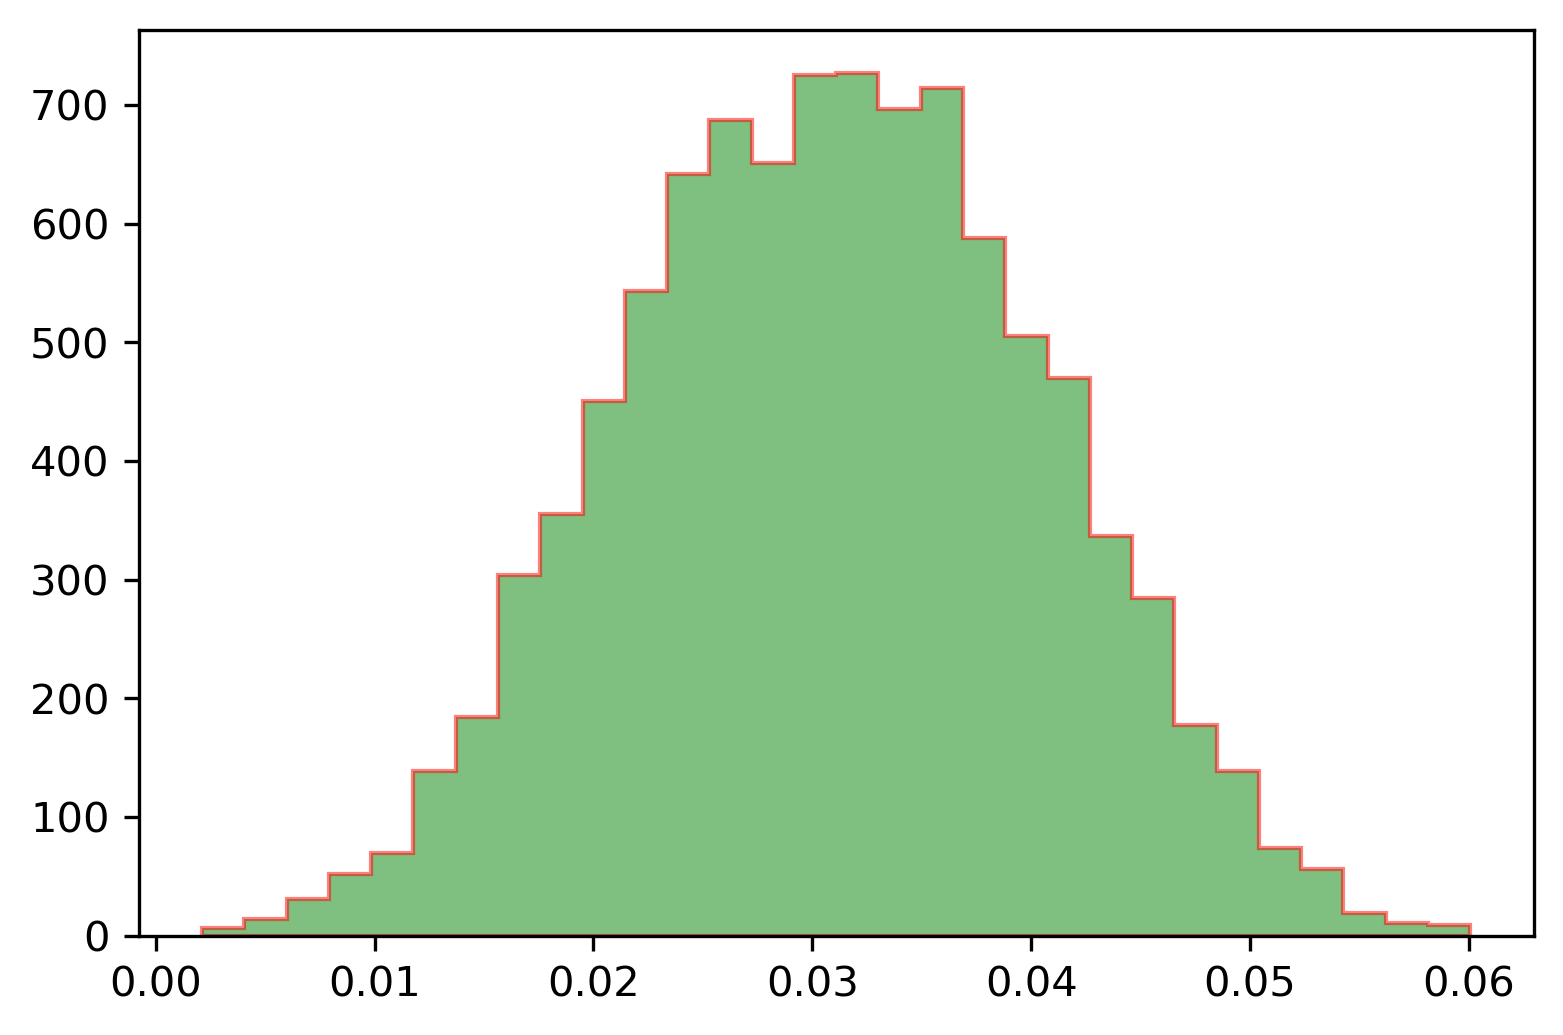

In [62]:
plt.hist(ozoneData2020New['arithmetic_mean'], bins=30, alpha=0.5,
histtype='stepfilled', color='green',
edgecolor='red');

C:\Users\abhee\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\abhee\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


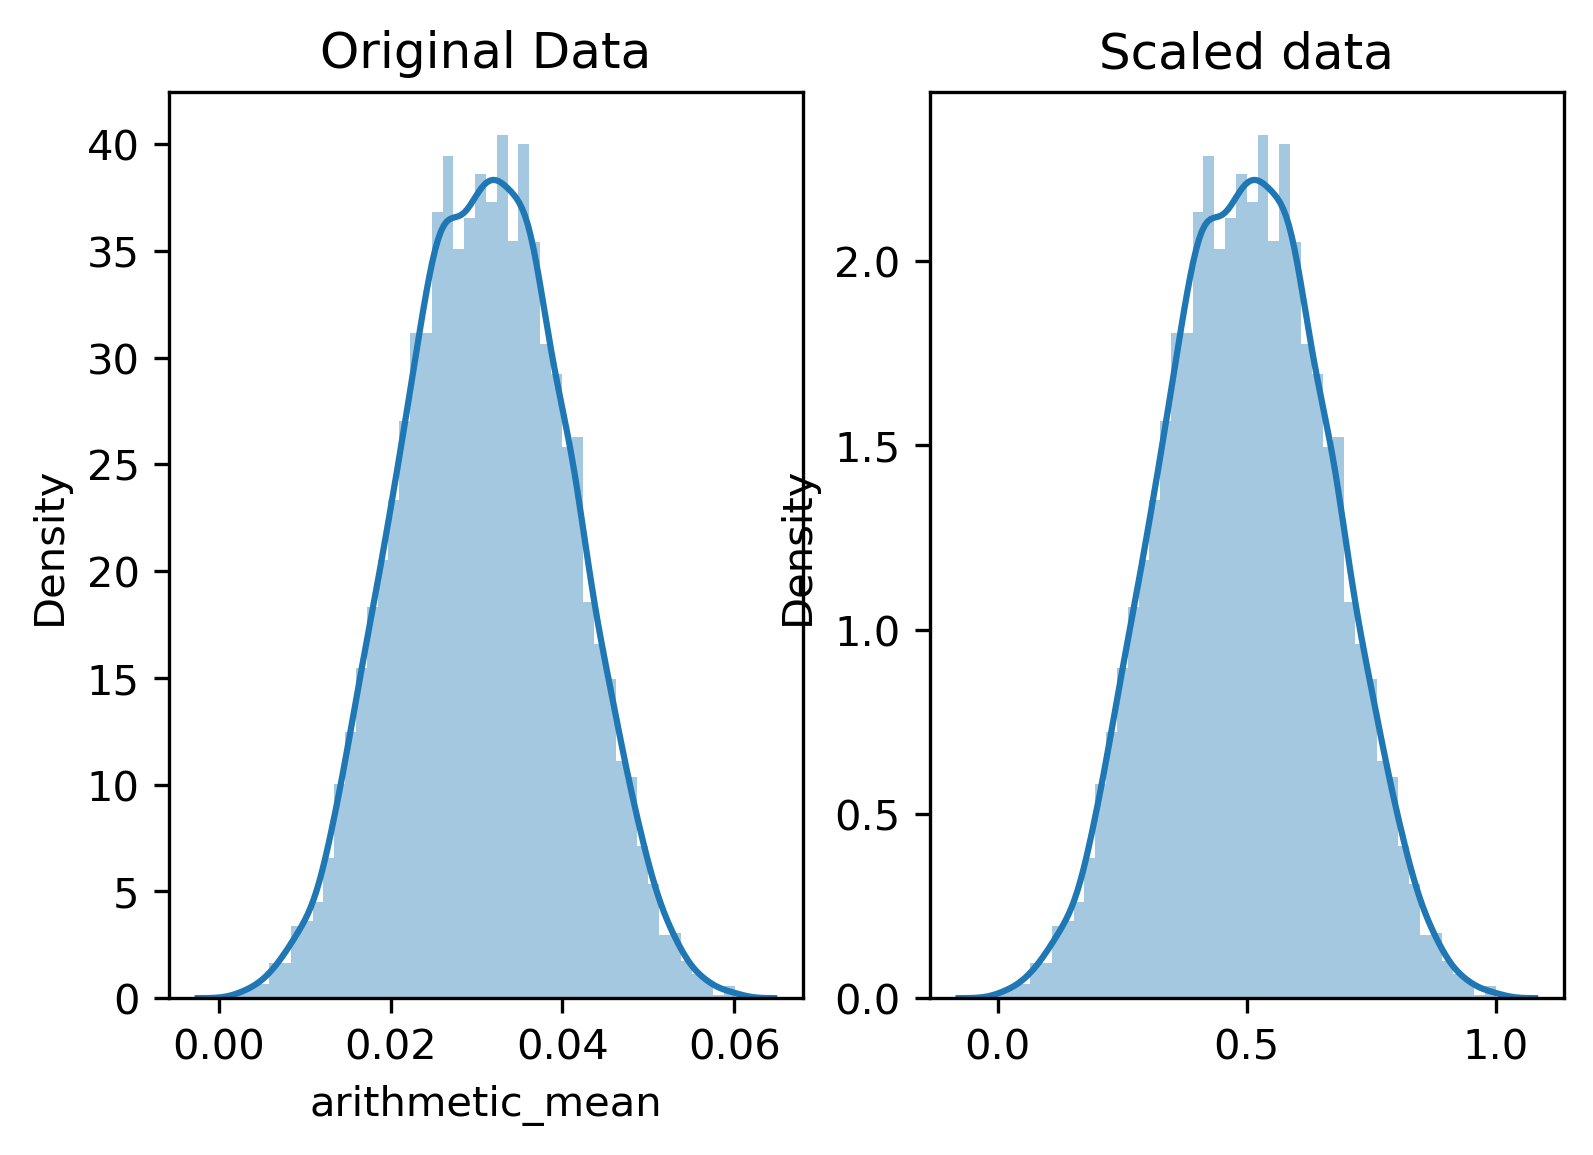

In [67]:
#7.scale

scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(ozoneData2020New['arithmetic_mean'].to_numpy().reshape(-1,1))
fig, ax=plt.subplots(1,2)

sns.distplot(ozoneData2020New['arithmetic_mean'], ax=ax[0])
ax[0].set_title("Original Data")
sns.distplot(scaled_data, ax=ax[1])
ax[1].set_title("Scaled data")
ozoneData2020New['arithmetic_mean']=scaled_data

C:\Users\abhee\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\abhee\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Normalized data')

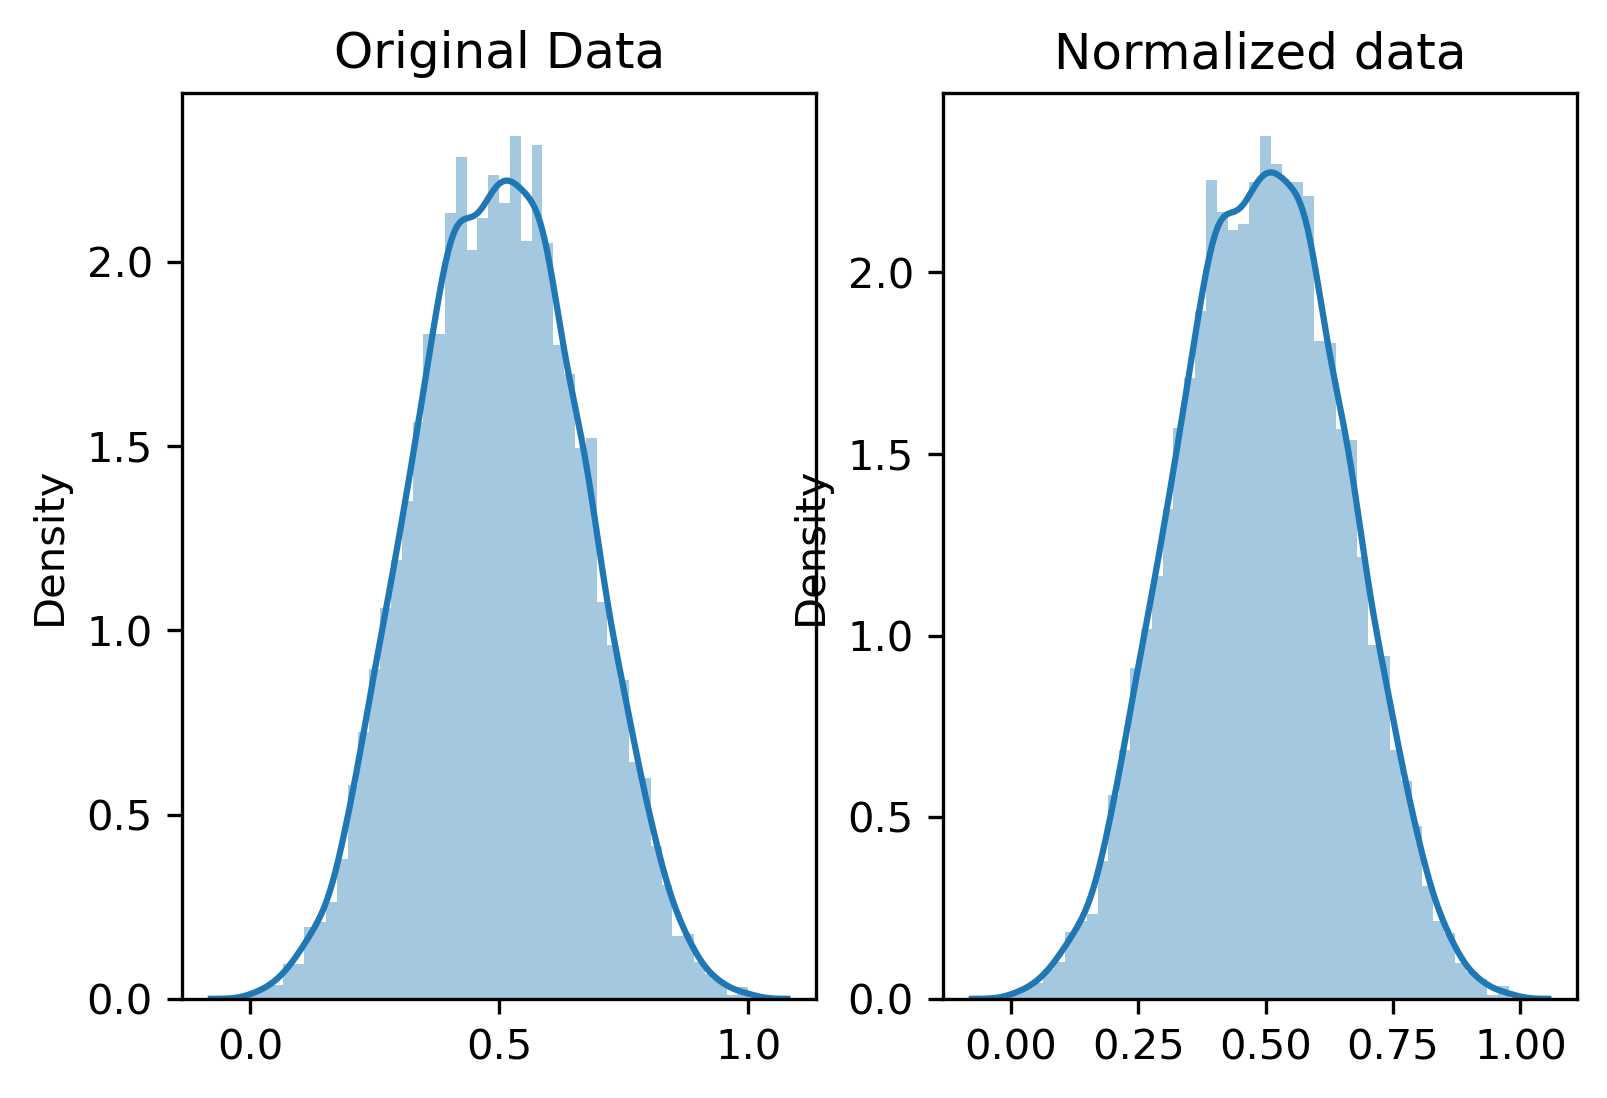

In [68]:
#8.normalize

normalized_data = stats.yeojohnson(ozoneData2020New['arithmetic_mean'])

# plot both together to compare
fig, ax=plt.subplots(1,2)
sns.distplot(scaled_data.flatten(), ax=ax[0])
ax[0].set_title("Original Data")
sns.distplot(normalized_data[0], ax=ax[1])
ax[1].set_title("Normalized data")

In [ ]:
# 9. Adding season column


In [ ]:
#10 . Merging


In [ ]:
sns.pairplot(df, hue="species")